# Some conclusions:


It turned out that SVC(kernel='linear') was extremely slow on our dataset probably due to its size — taking nearly 50 minutes to compute a learning curve and showing unstable cross-validation results (e.g., one fold scored as low as 0.53).

In contrast, LinearSVC — an optimized linear SVM implementation — proved to be:
	•	Drastically faster (completed in ~3 seconds)
	•	Scalable to large datasets and feature sets
	•	Consistently accurate, with cross-validation scores above 98% and an average of 99.36%

Although both models aim to find a linear decision boundary, their internal optimization approaches differ:
	•	SVC(kernel='linear') solves the dual problem using kernel methods — slower for large datasets.
	•	LinearSVC solves the primal problem directly — faster and better suited for high-dimensional data.

Based on both performance and accuracy, LinearSVC is the clear winner for this task.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve, StratifiedKFold




In [7]:
df_preprocessed = pd.read_csv('mushrooms_preprocessed.csv')

In [8]:
#Seperate the data into training and testing sets 

X = df_preprocessed.drop(columns = 'poisonous')
y = df_preprocessed['poisonous'].map({'e': 0, 'p': 1})  # 0 = edible, 1 = poisonous



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#Train the SVM model

svm_model = SVC(kernel = 'linear', C = 1.0, gamma = 'scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"], output_dict=True)

# Print manually with more precision
for label in ["Edible", "Poisonous"]:
    print(f"\nClass: {label}")
    print(f"  Precision: {report[label]['precision']:.5f}")
    print(f"  Recall:    {report[label]['recall']:.5f}")
    print(f"  F1-score:  {report[label]['f1-score']:.5f}")
    print(f"  Support:   {report[label]['support']:.0f}")

# Print overall metrics
print(f"\nOverall Accuracy: {report['accuracy']:.5f}")
print(f"Macro Avg F1:     {report['macro avg']['f1-score']:.5f}")
print(f"Weighted Avg F1:  {report['weighted avg']['f1-score']:.5f}")


Class: Edible
  Precision: 0.99881
  Recall:    0.99644
  F1-score:  0.99762
  Support:   843

Class: Poisonous
  Precision: 0.99617
  Recall:    0.99872
  F1-score:  0.99745
  Support:   782

Overall Accuracy: 0.99754
Macro Avg F1:     0.99754
Weighted Avg F1:  0.99754


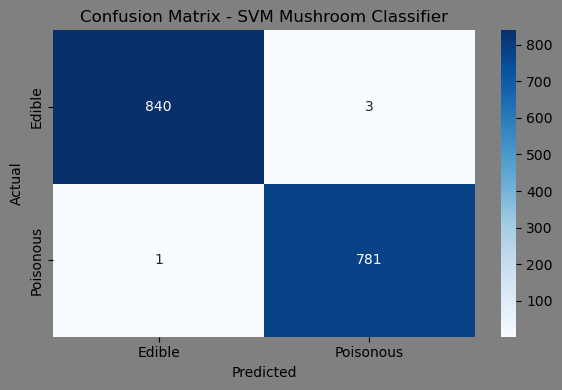

In [9]:
#Visualisation of confusion matrix


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 4), facecolor='grey')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Mushroom Classifier')
plt.tight_layout()
plt.show()

# SVM

In [10]:
# Evaluate SVM model using 5-fold cross-validation on the full dataset
cv_scores = cross_val_score(svm_model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print(f"Average cross-validation accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.89661538 0.99323077 0.95630769 1.         0.53325123]
Average cross-validation accuracy: 0.8759


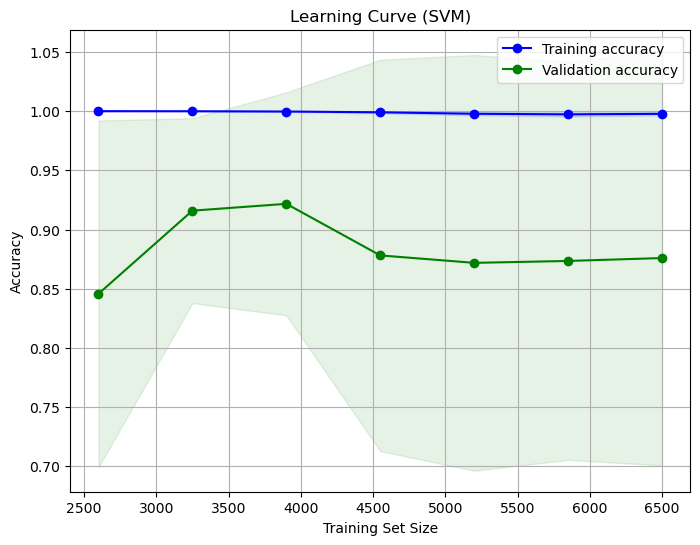

In [11]:

# Generate learning curve data for the SVM model
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Compute means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curve (SVM)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# SVC 

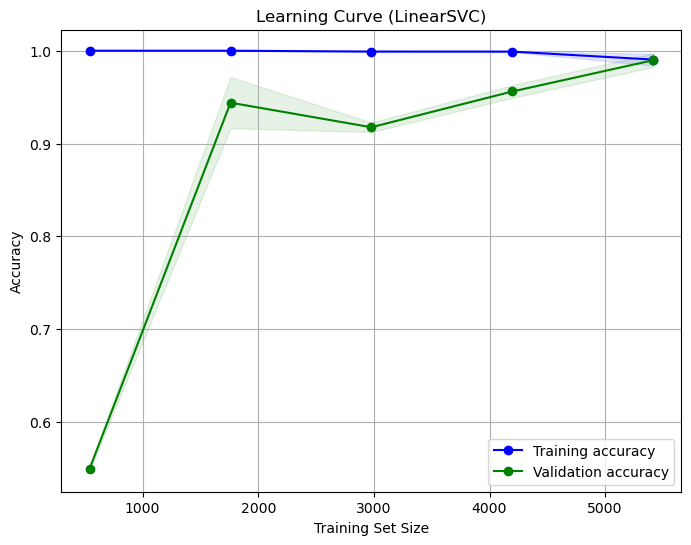

In [ ]:
# Faster and scalable SVM model
fast_svm = LinearSVC(dual=False, max_iter=5000, random_state=42)

# Use stratified 3-fold cross-validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    fast_svm, X, y, cv=skf, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 5),  # fewer points = faster
    n_jobs=-1
)

# Compute means and stds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label='Training accuracy', color='blue')
plt.plot(train_sizes, test_mean, 'o-', label='Validation accuracy', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curve (LinearSVC)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
linear_svc = LinearSVC(dual=False, max_iter=5000, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(linear_svc, X, y, cv=skf, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print(f"Average CV accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.98153846 0.99938462 0.99015385 0.99815385 0.99876847]
Average CV accuracy: 0.9936
